In [1201]:
# We import the libraries that we will use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly as py



In [1202]:
# We customize what we want to see
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [1203]:
# We upload the data set, we call it "tiburon"
tiburon = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")
tiburon


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1204]:
#We get the info of the database to see the Dtype of lements we have. This might come in handy later on
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [1205]:
#we cleant the data by first changing all the columns name special characters and spaces into " _ ", 
# this way we wont have any issue when manipulating columns.
#we first make a list with all the original colums, then we print them to see what we want to clean
#on the secon line of code, we replace them and obtain a dictionary with the old names and new names.
#we check again and see if there is any other special character to be cleaned.
columnas = list(tiburon.columns)
print(columnas)
tiburon_two = {columna: columna.replace(" ", "_").replace(".", "_").replace(":", "").lower() for columna in columnas}
print(tiburon_two)




['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']
{'Case Number': 'case_number', 'Date': 'date', 'Year': 'year', 'Type': 'type', 'Country': 'country', 'Area': 'area', 'Location': 'location', 'Activity': 'activity', 'Name': 'name', 'Sex ': 'sex_', 'Age': 'age', 'Injury': 'injury', 'Fatal (Y/N)': 'fatal_(y/n)', 'Time': 'time', 'Species ': 'species_', 'Investigator or Source': 'investigator_or_source', 'pdf': 'pdf', 'href formula': 'href_formula', 'href': 'href', 'Case Number.1': 'case_number_1', 'Case Number.2': 'case_number_2', 'original order': 'original_order', 'Unnamed: 22': 'unnamed_22', 'Unnamed: 23': 'unnamed_23'}


In [1206]:
# in this step we check the columns one by one to see that they are all understandable. 
#we can see that columns like "sex_" have an extra character that must be cleaned. This will be done manually
#It can also be done with Regex, but since its just a few, is faster manually
tiburon_two["Sex "] = "sex"
tiburon_two["Fatal (Y/N)"] = "fatal"
tiburon_two["Species "] = "species"



In [1207]:
#we rename all columns from the dictionary tiburon_two into our dataset, calling it tiburon_renamed.
#we print the head to see that all columns have the correct number.
tiburon_renamed = tiburon.rename(columns=tiburon_two)
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1208]:
# we drop all duplicated rows, since we dont need duplicated data.
tiburon_renamed.drop_duplicates(inplace=True)

In [1209]:
#We check the new shape
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1210]:
#Here we can sum all the nans inside the columns
tiburon_renamed.isna().sum()

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal                      549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number_1               10
case_number_2               10
original_order               3
unnamed_22                6311
unnamed_23                6310
dtype: int64

In [1211]:
#as we can see, unnamed 22 and 23 have 99% of the elements as NaN, so we can drop them
tiburon_renamed.drop(["unnamed_22", "unnamed_23"],axis=1,inplace=True)

In [1212]:
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1213]:
# I want to eliminate columns that are the same, mainly because they are useless and take extra space and proccesing time
# This step could had been done before changing the variable names, but I prefer it in this order. 
# All comparison follow the same structure: Check the shape of the dataframe (6312 rows) 
# and see if we get the same amount of rows betwen two columns

In [1214]:
# This is a bit confusing but here it goes:
# 1) After seeing the data head i realized that Date and Case_numbers are all dates that looks the same.
# 2) What I did was to check which rows does case_number and cas_number_2 are not the same, and we got 14 rows
# 3) I displayed them next to date, case_number, case_number_1 and case_number_2 and see if those 14 rows are also dates and similar.
# 4) The conclusion is that all case_number are the same as date and should be drop
tiburon_renamed[["date","case_number","case_number_1","case_number_2"]][(tiburon_renamed["case_number"])!=(tiburon_renamed["case_number_2"])].sample(14)

,date,case_number,case_number_1,case_number_2
6306,NaN,0,NaN,NaN
6302,NaN,0,NaN,NaN
5488,Reported 06-Sep-1905,NaN,1905.09.06.R,1905.09.06.R
6303,NaN,0,NaN,NaN
390,10-Jul-2015,2015.07-10,2015.07.10,2015.07.10
6307,NaN,0,NaN,NaN
6304,NaN,0,NaN,NaN
6309,NaN,0,NaN,NaN
25722,NaN,xx,NaN,NaN
8702,NaN,NaN,NaN,NaN


In [1215]:
# Since they al reflect date, we will erase all the case_number columns and leave only the date column
tiburon_renamed.drop(["case_number","case_number_1","case_number_2"],axis=1,inplace=True)

In [1216]:
tiburon_renamed



,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,original_order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1217]:
# I do this in order to see a cleaner dataframe
tiburon_renamed.sample(50)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,original_order
1588,14-May-2005,2005.0,Boating,USA,Hawaii,"North Kihei, Maui",Kayaking,J. Bailey,NaN,NaN,"No injury, shark bit kayak",N,11h00,"Tiger shark, 8' to 9'",Hawaii Department of Land and Natural Resources,2005.05.14-Bailey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4715.0
6085,04-Jun-1832,1832.0,Unprovoked,AUSTRALIA,New South Wales,"South Head, Sydney",Fishing,Aboriginal female,F,NaN,Leg severed,N,NaN,NaN,"Sydney Herald, 6/11/1832",1832.06.04-AboriginalWoman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,218.0
3926,25-Jan-1961,1961.0,Boat,SOUTH AFRICA,Western Cape Province,Frikkies Bay,Fishing for kob,"dinghy, occupants: Willem & Jan Groenwald",NaN,NaN,"No injury to occupants, shark took a gaffed fi...",N,NaN,4.6 m [15'] shark,"Cape Times, 1/27/1961; SAF Case #945",1961.01.25-Groenwald-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2377.0
1638,20-Sep-2004,2004.0,Unprovoked,USA,Oregon,Gold Beach,Surfing,Seth Mead,M,26,Leg bitten,N,09h00,White shark,"S. Mead, R. Collier, J. Eager, B. Middleton",2004.09.20-Mead.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4665.0
3756,12-Apr-1963,1963.0,Unprovoked,USA,Hawaii,"Awili, South Kona, Hawai'i",Surfing,Aiona Aka,M,15,Left foot & leg bitten,N,14h00,3.7 to 4.5 m [12' to 15'] shark seen in vicinity,"L. Taylor (1993), pp.102-103",1963.04.12-Aka.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2547.0
6238,Before 1962,0.0,Unprovoked,FIJI,NaN,NaN,Spearfishing,Dalton Baldwin,M,27,"No injury, bumped by shark which took speared ...",N,NaN,1.8 m [6'] shark,"V. M. Coppleson (1962), p.253",ND-0069-Dalton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,65.0
4280,20-Sep-1955,1955.0,Unprovoked,USA,Hawaii,East Moloka'i,Hunting turtle,Philip C. Diez,M,NaN,Arm bitten,N,09h00,NaN,"J. Borg, p.73; L. Taylor (1993), pp.100-101; ...",1955.09.20-Diez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2023.0
5735,1888,1888.0,Unprovoked,LIBYA,Mediterranean Sea,Off Tripoli,Sponge diving,T riantafyllos,M,NaN,Lacerations to thorax and hands,N,NaN,NaN,M. Bardanis,1888.00.00-Triantafyllos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,568.0
5366,Reported 30-Nov-1912,1912.0,Sea Disaster,PHILIPPINES,NaN,NaN,Swimming from foundered vessel,Bessie Lambert,F,19,FATAL,Y,NaN,NaN,"C.Moore, GSAF",1912.11.30.R-Lambert.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,937.0
3670,Aug-1964,1964.0,Unprovoked,PANAMA,San Blas,Off Achutuppu Island near Ailigandi,Free diving / Spearfishingat edge of reef,male,M,21,Foot lacerated,N,NaN,Less than 1.2 m [4'],H. Loftin,1964.08.00-Achtupu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2633.0


In [1218]:
#here i count the amount of NaN that i have in each column
tiburon_renamed.isna().sum()


date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal                      549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
original_order               3
dtype: int64

In [1219]:
#I decided to drop all the columns that i wont use in my hypothesis
tiburon_clean = tiburon_renamed.drop(["species","time","original_order","href","href_formula","pdf","investigator_or_source"],axis=1)

In [1220]:
#By making these lines of code, I can erase all the columns and rows where all values are NaN
tiburon_clean.dropna(axis=0, how='all',inplace=True)
tiburon_clean.dropna(axis=1, how='all',inplace=True)


In [1221]:
tiburon_clean.activity.fillna("unknow",inplace=True)

In [1222]:
#In this loop i can check the unique values of each column
# I then print al lvalues and see which function il lcreate to clean further
for i in tiburon_clean.keys():
    
    print(i, len(list(tiburon_clean[i].unique())))

date 5433
year 250
type 9
country 213
area 826
location 4109
activity 1533
name 5231
sex 7
age 158
injury 3738
fatal 9


In [1223]:
set(list(tiburon_clean["date"].unique()))

{'24-Apr-2013',
 ' 07-Apr-1877',
 '26-Dec-1957',
 'Reported 14-Jul-1865',
 '04-Jan-2006',
 '26-Mar-1937',
 'Reported 11-Sep-1896',
 '21-Sep-1913',
 '1896',
 '12-May-1962',
 '27-Aug-1934',
 '25-Jul-1985',
 '23-Oct-1926',
 '10-Mar-1891',
 '11-Sep-2011',
 '20-Apr-1924',
 '1748',
 ' 2-Jul-1997',
 '18-Feb-1986',
 '24-May-1950',
 '21-Feb-2017',
 '03-Dec-1959',
 '14-Jun-1931',
 '29-Nov-1891',
 '13-Dec-1929',
 '26-Aug-1962',
 'Reported 22-Apr-1830',
 '03-Jun-1989',
 '18-Mar-2017',
 '12-Nov-2011',
 'Ca. 1881',
 '24-Sep-2005',
 '06-Dec-2011',
 ' 11-Mar-1877',
 '07-Jul-1937',
 '10-Jan-1996',
 'Ca. 1839',
 'Reported 31-Jul-1911',
 '24-Nov-2008',
 '02-Jun-2004',
 '03-Apr-1958',
 '21-Dec-1952',
 'Ca. 1939',
 'Reported 05-Sep-1906',
 '06-Aug-1950',
 '14-Apr-1961',
 '24-Jan-2009',
 '13-Aug-2000',
 '20-Mar-1935',
 'Jul-1964',
 '05-Oct-2011',
 '27-Dec-2008',
 '18-Mar-2009',
 'Dec-1993',
 '06-Apr-2009',
 'Reported 16-Sep-1845',
 '20-Sep-2015',
 '19-Nov-1975',
 '28-Sep-1974',
 '26-Jan-1912',
 '28-May-1965

In [1224]:
def clean_date(x):
    if "jan" in x or "Jan" in x:
        return "January"
    elif "feb" in x or "Feb" in x:
        return "February"
    elif "mar" in x or "Mar" in x:
        return "March" 
    elif "apr" in x or "Apr" in x:
        return "April"
    elif "may" in x or "May" in x:
        return "May" 
    elif "jun" in x or "Jun" in x:
        return "June"
    elif "jul" in x or "Jul" in x:
        return "July" 
    elif "aug" in x or "Aug" in x:
        return "August"
    elif "sep" in x or "Sep" in x:
        return "September" 
    elif "oct" in x or "Oct" in x:
        return "October"
    elif "nov" in x or "Nov" in x:
        return "November" 
    elif "dec" in x or "Dec" in x:
        return "December"
    else: 
        return np.nan

In [1225]:
tiburon_clean["clean_date"] = tiburon_clean.date.apply(clean_date)


In [1226]:
set(list(tiburon_clean["clean_date"].unique()))

{'April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September',
 nan}

In [1227]:
set(list(tiburon_clean["type"].unique()))
tiburon_clean["type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [1228]:
def clean_type(x):
    if x == "Unprovoked":
        return "Unprovoked"
    elif x == "Provoked":
        return "Provoked"
    else:
        return np.nan

In [1229]:
tiburon_clean["type"] = tiburon_clean.type.apply(clean_type)

In [1230]:
set(list(tiburon_clean["country"].unique()))

{' PHILIPPINES',
 ' TONGA',
 'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT ',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH PO

In [1231]:
def regex_activity(x):
    return "".join(re.findall(r'\b(\w+ing)\b',x)).lower()


In [1232]:
tiburon_clean["activity_verb"] = tiburon_clean.activity.apply(regex_activity)

In [1233]:
set(list(tiburon_clean["activity_verb"].unique()))


{'',
 'abandoningburning',
 'abandoningburningraging',
 'angling',
 'ascending',
 'attaching',
 'attempting',
 'attemptingdrowning',
 'attemptingfishing',
 'attemptingsailing',
 'attemptingswimming',
 'awaiting',
 'bathing',
 'bathingstanding',
 'bathingsurfing',
 'bathingswimming',
 'bathingwashing',
 'bathingwhaling',
 'being',
 'beingfishing',
 'bending',
 'boarding',
 'boardingsurfing',
 'boardingswimming',
 'boardingwading',
 'boating',
 'bodyboarding',
 'bodysurfing',
 'boeing',
 'bringing',
 'burning',
 'canoeing',
 'carrying',
 'casting',
 'catching',
 'chasingbathingriding',
 'checking',
 'chumming',
 'clamming',
 'cleaning',
 'climbing',
 'climbingrepairing',
 'clinging',
 'clingingrowing',
 'collecting',
 'coming',
 'competingfishing',
 'competingrowing',
 'competingspearfishingtowing',
 'competingstanding',
 'conducting',
 'crabbing',
 'crabbingspearing',
 'crawling',
 'crayfishing',
 'crossing',
 'crossingfighting',
 'crossingswimming',
 'crouching',
 'cruising',
 'cutting

In [1234]:
nowater =[]

In [1235]:
def activity_grouping(x):
    if "swimming" in x or "diving" in x or "snorkel" in x or "drown" in x or "float" in x:
        return "swimming"
    elif "surfing" in x or "board" in x or "paddl" in x: 
        return "surfing"
    elif "netting" in x or "fishing" in x or "shell" in x or "oyster" in x or "lobster" in x or "pearl" in x or "spear" in x or "harpoon" in x or "crab" in x or "shrimp" in x:
        return "fishing"
    elif "yacht" in x or "boat" in x or "kayak" in x or "canoe" in x or "kakay" in x or "sail" in x or "sink" in x or "ski" in x or "row" in x:
        return "vessel related"
    elif "collecting" in x or "washing" in x or "wading" in x or "stand" in x or "knee" in x or "walking" in x or "splash" in x or "bath" in x or "sitting" in x or "tread" in x:
        return "Close to the water"
    else:
        nowater.append(x)
        return "other activity"

In [1236]:
tiburon_clean["activity_verb2"] = tiburon_clean.activity_verb.apply(activity_grouping)

In [1237]:
set(list(tiburon_clean["activity_verb2"].unique()))

{'Close to the water',
 'fishing',
 'other activity',
 'surfing',
 'swimming',
 'vessel related'}

In [1238]:
tiburon_clean["activity_verb2"].value_counts()

swimming              1836
other activity        1294
surfing               1288
fishing               1141
Close to the water     594
vessel related         149
Name: activity_verb2, dtype: int64

In [1239]:
set(list(nowater))



{'',
 'abandoningburning',
 'abandoningburningraging',
 'angling',
 'ascending',
 'attaching',
 'attempting',
 'awaiting',
 'being',
 'bending',
 'boeing',
 'bringing',
 'burning',
 'carrying',
 'casting',
 'catching',
 'checking',
 'chumming',
 'clamming',
 'cleaning',
 'climbing',
 'climbingrepairing',
 'clinging',
 'coming',
 'conducting',
 'crawling',
 'crossing',
 'crossingfighting',
 'crouching',
 'cruising',
 'cutting',
 'dangling',
 'defecating',
 'deserting',
 'dismantling',
 'ditching',
 'dragging',
 'drawing',
 'dropping',
 'during',
 'duringfilming',
 'dynamiting',
 'escaping',
 'escapingblackbirding',
 'examining',
 'exercising',
 'expecting',
 'feeding',
 'feeling',
 'fighting',
 'filming',
 'filmingcarrying',
 'filmingfeeding',
 'finning',
 'fleeing',
 'flying',
 'footing',
 'foundering',
 'gaffing',
 'gaffingattemptingbring',
 'gathering',
 'gigging',
 'grabbing',
 'guarding',
 'hanging',
 'harassing',
 'hauling',
 'helping',
 'hiking',
 'holding',
 'holdingdangling',
 

In [1240]:
tiburon_clean[tiburon_clean["activity_verb"] == "murdering"]


,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2
5839,13-Oct-1878,1878.0,Unprovoked,NaN,NaN,NaN,Jumped overboard after murdering 2 shipmates,Sherrington,M,NaN,FATAL,Y,October,murdering,other activity


In [1241]:
tiburon_clean[tiburon_clean["activity_verb"] == "defecating"]

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2
4488,1950 - 1951,1950.0,Unprovoked,LIBERIA,Montserrado,Monrovia,Defecating in water beneath the docks,a dock worker,M,NaN,FATAL,Y,NaN,defecating,other activity


In [1242]:
tiburon_clean[tiburon_clean['activity_verb'].str.contains('sleeping')==True]

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2
2387,24-May-1995,1995.0,Unprovoked,FIJI,Yasawa Islands,Waya Island,Sleeping in anchored boat,Kinijioji Vindovi,M,69,"FATAL, hand & leg severely injured by shark th...",Y,May,sleeping,other activity


In [1243]:
# Here we changed all the nan to the word we wanted
#tiburon_clean.sex.fillna("unknow",inplace=True)

In [1244]:
# here we modified one speceific column with the info we want, getting rid of spaces
tiburon_clean.sex = tiburon_clean.sex.str.strip()

In [1245]:
# we make a dict with the key an value that we want to change
cleandict = {".":np.nan,"lli":np.nan,"N":"M"}
tiburon_clean.sex = tiburon_clean.sex.replace(cleandict)

In [1246]:
set(list(tiburon_clean["sex"].unique())) 
       

{'F', 'M', nan}

In [1247]:
tiburon_clean.age.fillna("unknow",inplace=True)

In [1248]:
#Ricardo, esto fue lo que hiciste: primero querias limpiar la data a numeros asi que en regex usuaste: 
# re.findall(r'\b\d+\b',x)
#Luego para que esa lista pasara a integros usaste: [int(i) for i in re.findall(r'\b\d+\b',x)]
#Para sacar la media en np colocaste: np.mean([int(i) for i in re.findall(r'\b\d+\b',x)])
#por ultimo, para no tener float colocaste: int()

#ok, por que los loops? pues facil, te diste cuenta que la lsita peude estar vacia y que te daba error
#por el mean, asi que le pediste que si la lista estaba vacia pues te diera unknow, sino, lo de arriba
def regex_age(x):
    if "month" in x:
        return "unknow"
    else:
        if [int(i) for i in re.findall(r'\b\d+\b',x)] == []:
            return "unknow"
        else:
            return int(np.mean([int(i) for i in re.findall(r'\b\d+\b',x)])) 

In [1249]:
tiburon_clean["age_2"] = tiburon_clean.age.apply(regex_age)

In [1250]:
set(list(tiburon_clean["age_2"].unique()))

{1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 8,
 81,
 82,
 84,
 86,
 87,
 9,
 'unknow'}

In [1251]:
tiburon_clean.fatal.fillna("unknow",inplace=True)

In [1252]:
tiburon_clean.fatal = tiburon_clean.fatal.str.strip()

In [1253]:
dict_fatal = {"2017":"unknow","M":"N","UNKNOWN":"unknow","y":"Y"}
tiburon_clean.fatal = tiburon_clean.fatal.replace(dict_fatal)

In [1254]:
set(list(tiburon_clean["fatal"].unique()))

{'N', 'Y', 'unknow'}

In [1255]:
tiburon_clean.sample(50)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2,age_2
6085,04-Jun-1832,1832.0,Unprovoked,AUSTRALIA,New South Wales,"South Head, Sydney",Fishing,Aboriginal female,F,unknow,Leg severed,N,June,fishing,fishing,unknow
3982,29-Jun-1960,1960.0,Provoked,USA,South Carolina,"Little River Beach, Horry County",Surf fishing,Monte Gray,M,unknow,"Lacerations to calf, wrist & thumb by hooked s...",N,June,fishing,fishing,unknow
1054,09-Jan-2010,2010.0,Unprovoked,VIETNAM,Binh Dinh Province,Quy Nhon,unknow,Mang Duc Hanh,M,unknow,Right wrist bitten,N,January,,other activity,unknow
4726,1942,1942.0,NaN,NaN,NaN,NaN,Jumped overboard from torpedoed Panamanian fre...,male,M,unknow,FATAL,Y,NaN,,other activity,unknow
153,20-Apr-2017,2017.0,NaN,USA,South Carolina,Georgetown County,Swimming,male,M,unknow,Laceration & puncture wounds to left foot,unknow,April,swimming,swimming,unknow
628,01-Sep-2013,2013.0,Provoked,USA,Florida,Key West Aquarium,unknow,female,M,3,Arm bitten by captive shark PROVOKED INCIDENT,N,September,,other activity,3
815,01-Mar-2012,2012.0,Provoked,CHILE,Antofagasta Province,Antofagasta,Fishing (illegally),Paye León Salomón,M,unknow,Hand injured PROVOKED INCIDENT,N,March,fishing,fishing,unknow
332,15-Nov-2015,2015.0,Unprovoked,USA,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",Surfing,Allen Engelman,M,28,Lacerations to hand,N,November,surfing,surfing,28
2472,16-Sep-1993,1993.0,Unprovoked,EL SALVADOR,La Libertad,near El Cocal Beach,Surfing,Jose Diter Roque,NaN,15,Left leg gashed,N,September,surfing,surfing,15
1315,29-Oct-2007,2007.0,Unprovoked,USA,Hawaii,"Wailea, Maui",Floating,Aaron Finley,M,32,Lacerations to left lower leg,N,October,floating,swimming,32


In [1256]:
tiburon_hipotesis = tiburon_clean.drop(["location","date","activity","activity_verb","year","area","name","age"],axis=1)

In [1257]:
tiburon_hipotesis.isna().sum()

type              1133
country             50
sex                567
injury              28
fatal                0
clean_date         519
activity_verb2       0
age_2                0
dtype: int64

In [1258]:
# La data lista para empezar a testear las hipotesis
tiburon_hipotesis = tiburon_hipotesis[['clean_date', 'country', 'age_2','sex', 'injury','fatal','activity_verb2',"type"]]

In [1259]:
def unknow_nan(x):
    if x == "unknow":
        return np.nan
    elif x == "other":
        return np.nan
    elif x == "return":
        return np.nan
    else:
        return x

In [1260]:
tiburon_hipotesis["fatal"] = tiburon_hipotesis.fatal.apply(unknow_nan)

In [1261]:
tiburon_hipotesis["age_2"] = tiburon_hipotesis.age_2.apply(unknow_nan)

In [1262]:
tiburon_hipotesis["sex"] = tiburon_hipotesis.sex.apply(unknow_nan)

In [1263]:
tiburon_hipotesis["activity_verb2"] = tiburon_hipotesis.activity_verb2.apply(unknow_nan)

In [1264]:
tiburon_hipotesis["clean_date"] = tiburon_hipotesis.clean_date.apply(unknow_nan)

In [1265]:

tiburon_hipotesis

,clean_date,country,age_2,sex,injury,fatal,activity_verb2,type
0,June,USA,57.0,F,"No injury to occupant, outrigger canoe and pad...",N,surfing,NaN
1,June,USA,11.0,F,Minor injury to left thigh,N,Close to the water,Unprovoked
2,June,USA,48.0,M,Injury to left lower leg from surfboard skeg,N,surfing,NaN
3,June,AUSTRALIA,NaN,M,Minor injury to lower leg,N,surfing,Unprovoked
4,June,MEXICO,NaN,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,swimming,Provoked
...,...,...,...,...,...,...,...,...
6297,NaN,AUSTRALIA,NaN,M,FATAL,Y,swimming,Unprovoked
6298,NaN,AUSTRALIA,NaN,M,FATAL,Y,swimming,Unprovoked
6299,NaN,USA,NaN,M,FATAL,Y,swimming,Unprovoked
6300,NaN,PANAMA,NaN,M,FATAL,Y,other activity,Unprovoked


In [1266]:
#tiburon_hipotesis.to_csv("../tiburon_hipotesis.csv",index=False)

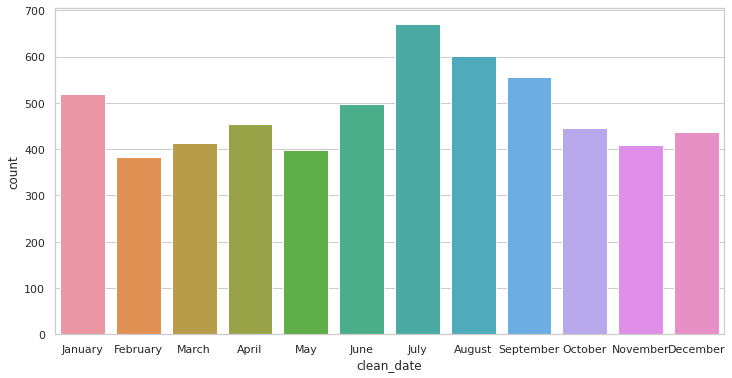

In [1267]:
sns.countplot(x=dfdate, order= ["January","February","March","April","May","June","July","August","September","October","November","December"]);

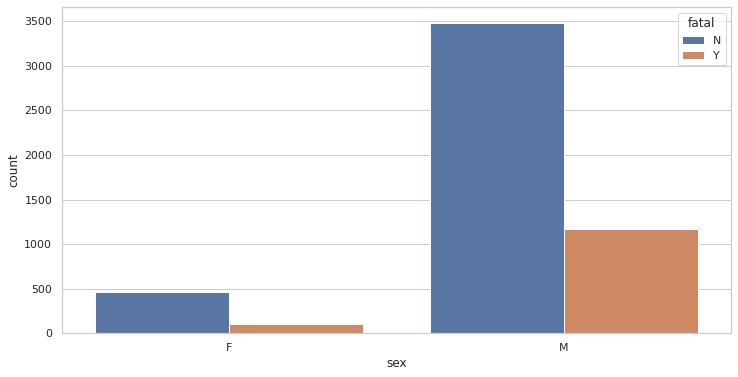

In [1268]:
sns.countplot(x="sex", hue="fatal", data=tiburon_hipotesis);

In [1269]:
#should use shape, rows and column but the brain aint finding it
fat_sex_group = tiburon_hipotesis.groupby(["fatal"])["sex"].value_counts().unstack()
print(fat_sex_group)
print("Deadly encounter female ratio:",(fat_sex_group["F"]["Y"]/(fat_sex_group["F"]["Y"]+ fat_sex_group["F"]["N"])))
print("Deadly encounter male ratio:",(fat_sex_group["M"]["Y"]/(fat_sex_group["M"]["Y"]+fat_sex_group["M"]["N"])))

sex      F     M
fatal           
N      468  3484
Y      107  1174
Deadly encounter female ratio: 0.18608695652173912
Deadly encounter male ratio: 0.25203950193215974


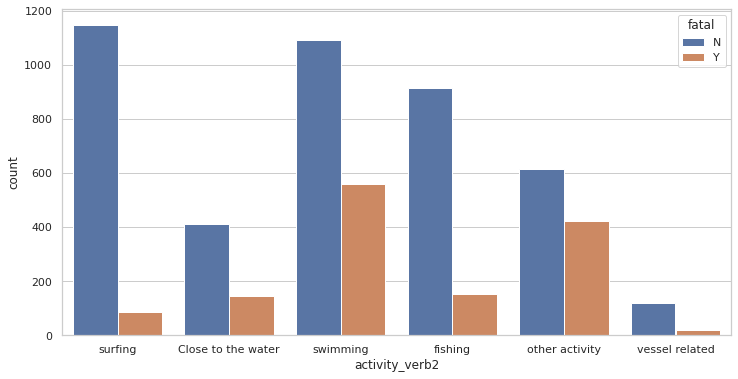

In [1270]:
sns.countplot(x="activity_verb2", hue="fatal", data=tiburon_hipotesis);

In [1271]:
act_fat_group = tiburon_hipotesis.groupby(["fatal"])["activity_verb2"].value_counts().unstack()
print("Close to the water:",(act_fat_group["Close to the water"]["Y"]/(act_fat_group["Close to the water"]["Y"]+ act_fat_group["Close to the water"]["N"])))
print("fishing:",(act_fat_group["fishing"]["Y"]/(act_fat_group["fishing"]["Y"]+act_fat_group["fishing"]["N"])))
print("surfing:",(act_fat_group["surfing"]["Y"]/(act_fat_group["surfing"]["Y"]+act_fat_group["surfing"]["N"])))
print("swimming:",(act_fat_group["swimming"]["Y"]/(act_fat_group["swimming"]["Y"]+act_fat_group["swimming"]["N"])))
print("vessel related:",(act_fat_group["vessel related"]["Y"]/(act_fat_group["vessel related"]["Y"]+act_fat_group["vessel related"]["N"])))
print("other activity:",(act_fat_group["other activity"]["Y"]/(act_fat_group["other activity"]["Y"]+act_fat_group["other activity"]["N"])))


Close to the water: 0.2629695885509839
fishing: 0.14339268978444236
surfing: 0.06963562753036437
swimming: 0.33958837772397094
vessel related: 0.1366906474820144
other activity: 0.40712223291626565


mean: 27.324838898652608
median: 24.0


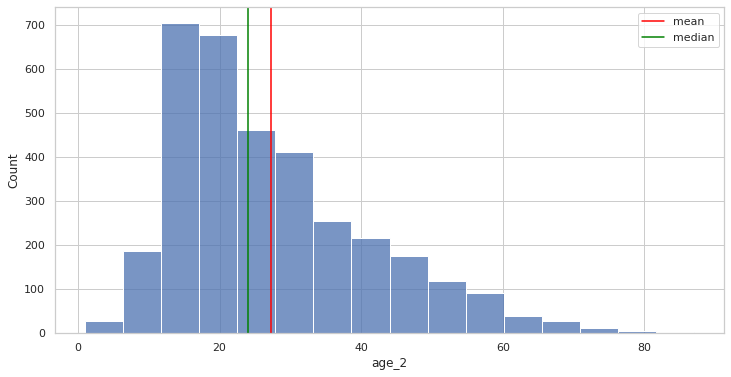

In [1282]:
graf= sns.histplot(x="age_2", data = tiburon_hipotesis, bins=16)
graf.axvline(x=tiburon_hipotesis.age_2.mean(), c="red", label="mean")
graf.axvline(x=tiburon_hipotesis.age_2.median(), c="green", label="median")
plt.legend();
print("mean:",tiburon_hipotesis.age_2.mean())
print("median:",tiburon_hipotesis.age_2.median())

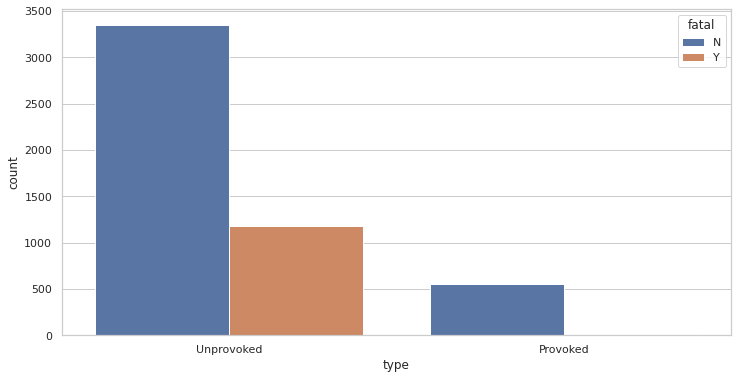

In [1286]:
typ_fat_group = sns.countplot(x="type", hue="fatal", data=tiburon_hipotesis);


In [1287]:
ty_fat_group = tiburon_hipotesis.groupby(["fatal"])["type"].value_counts().unstack()

In [1288]:
ty_fat_group

type,Provoked,Unprovoked
fatal,,
N,549,3351
Y,19,1181


<AxesSubplot:xlabel='age_2', ylabel='Density'>

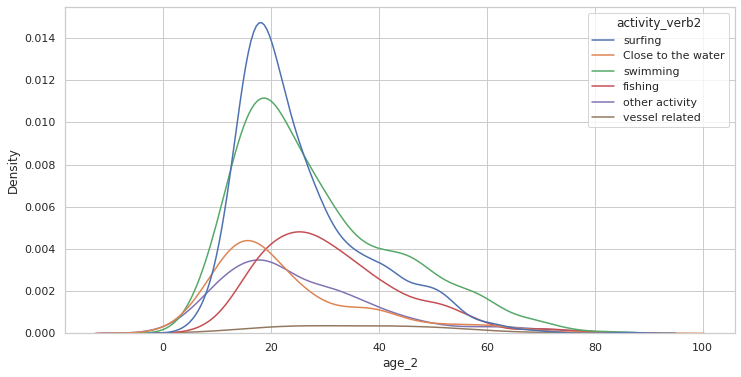

In [1293]:
sns.kdeplot(x=tiburon_hipotesis.age_2, hue=tiburon_hipotesis.activity_verb2)